In [5]:
import scipy as sci
from scipy.special import factorial, assoc_laguerre, sph_harm
from scipy import constants
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
import seaborn as sns; sns.set_theme()

In [2]:
def Psi(n, l, m, x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    
    cz1 = np.sqrt((2.0/n)**3 * factorial(n-l-1)/(2.0*n*factorial(n+l)))
    cz1 = cz1 * np.exp(-r/n) * (2.0*r/n)**l * assoc_laguerre(2.0*r/n, n-l-1, 2*l+1)
    
    cz2 = cz1 *  sph_harm(m, l, phi, theta)
    
    return cz2

In [3]:
n = 1
l = 0
m = 0
u_lim = 1
b_lim = -1
step = 0.01
xs = np.arange(b_lim, u_lim, step)
ys = np.arange(b_lim, u_lim, step)
zs = np.arange(b_lim, u_lim, step)
x, y, z = np.meshgrid(xs, ys, zs)
prob = np.abs(Psi(n, l, m, x, y, z))**2

In [21]:
%matplotlib tk
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


verts, faces, normals, values = measure.marching_cubes(prob, prob.mean())


ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='gist_rainbow')
ax.set_title(f'Liczby kwantowe wodoru n={n}, l={l}, m={m}') 
plt.show()

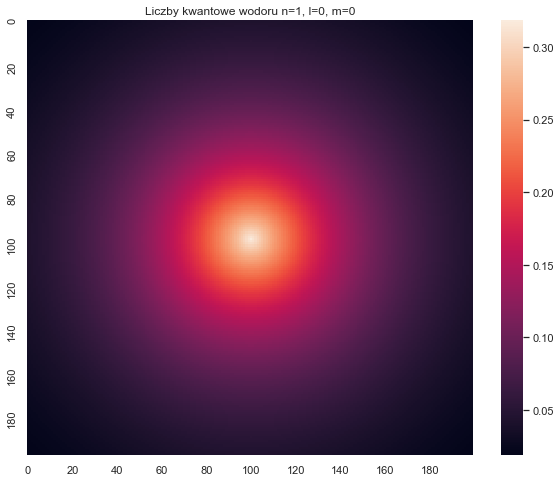

In [16]:
#%matplotlib tk
fig, ax = plt.subplots(figsize = (10,8))


#sns.heatmap(prob[:, int(len(prob)/2), :], xticklabels=20, yticklabels=20) # Odkomentuj aby zobaczyć przekrój X lub Y w połowie
sns.heatmap(prob[:, :, int(len(prob)/2)], xticklabels=20, yticklabels=20) # Odkomentuj aby zobaczyć przekrój Z w połowie

#plt.colorbar()
ax.set_title(f'Liczby kwantowe wodoru n={n}, l={l}, m={m}')
plt.show()